#### Q1. Obtain the degree and clustering coefficienct for each node

##### Node 1
Degree = 2;
Clustering coefficienct = 1
##### Node 2
Degree = 2;
Clustering coefficienct = 1
##### Node 3
Degree = 2;
Clustering coefficienct = 1
##### Node 4
Degree = 4;
Clustering coefficienct = 1/3
##### Node 5
Degree = 2;
Clustering coefficienct = 1

#### Q2. Compare a real-world graph data set with the random graph using NetworkX

##### (a) Wikipedia vote network dataset

In [1]:
# import libraries to be used
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'networkx'

In [2]:
# (i) Load the dataset
# Please ensure the .txt file is in the same directory as this notebook
# Data source: http://snap.stanford.edu/data/wiki-Vote.txt.gz
with open('wiki-Vote.txt', 'r') as f:
    lst = []
    for line in f:
        line = line.rstrip()
        lst.append(line)
    rows = lst[4:] # First 3 rows are descriptions, eliminated here
# Read edgelist as directed graph
wiki = nx.read_edgelist(rows, delimiter='\t', create_using=nx.DiGraph(), nodetype=int)

In [3]:
# (ii) Output related to degree
N = wiki.number_of_nodes()
dict_in = dict(wiki.in_degree())
dict_out = dict(wiki.out_degree())
dict_d = dict(wiki.degree())
print("Average degree:", sum(dict_d.values())/N)
print("Average in-degree:", sum(dict_in.values())/N)
print("Average out-degree:", sum(dict_out.values())/N)

Average degree: 29.146591707659873
Average in-degree: 14.573295853829936
Average out-degree: 14.573295853829936


In [4]:
# Compute the x values and y values for degree distribution plot
# In-degree 
in_d = set(dict_in.values())
out_d = set(dict_out.values())
in_freq = []
for i in in_d:
    count = 0
    for j in dict_in.values():
        if j == i:
            count += 1
    in_freq.append(count)
# Out-degree
out_freq = []
for i in out_d:
    count = 0
    for j in dict_out.values():
        if j == i:
            count += 1
    out_freq.append(count)

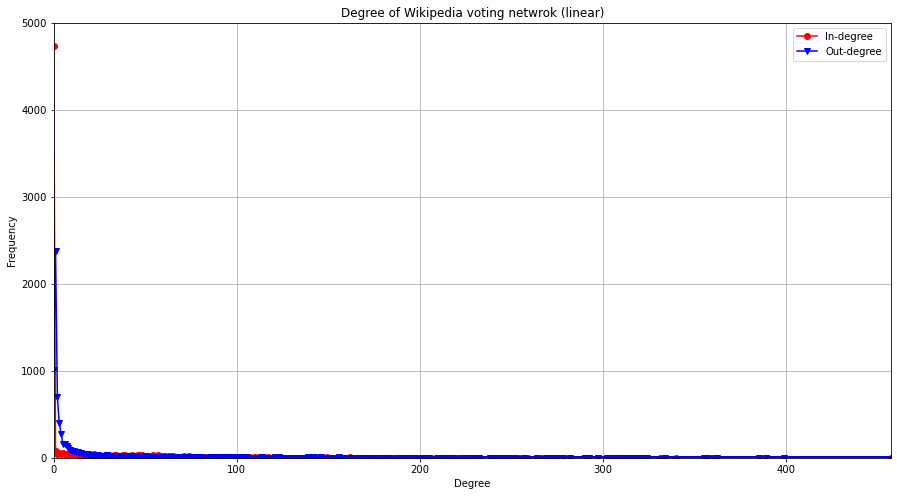

In [5]:
# Degree distribution plot in linear scale
plt.figure(figsize=(15,8))
plt.plot(list(in_d), in_freq, 'ro-')
plt.plot(list(out_d), out_freq, 'bv-')
plt.title('Degree of Wikipedia voting netwrok (linear)')
plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim([0,max(in_d)])
plt.ylim([0,5000])
plt.show()

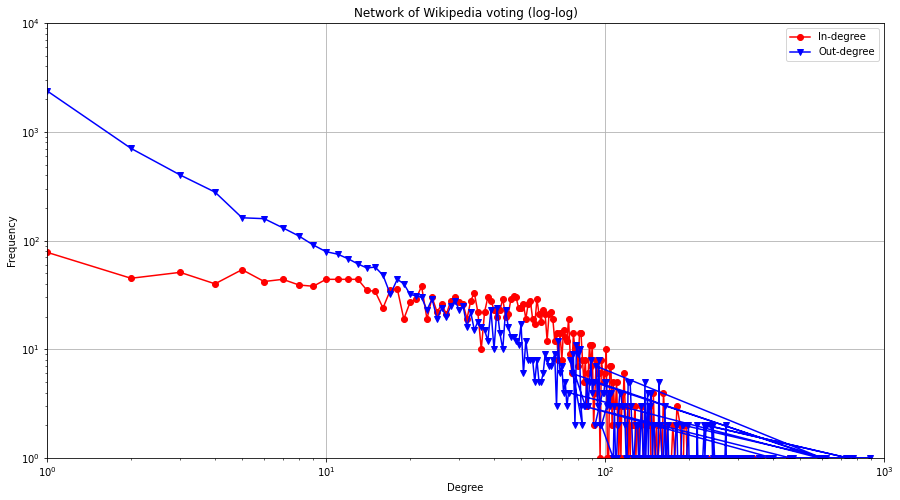

In [6]:
# Degree distribution plot in log scale
plt.figure(figsize=(15,8))
plt.loglog(list(in_d), in_freq, 'ro-')
plt.loglog(list(out_d), out_freq, 'bv-')
plt.title('Network of Wikipedia voting (log-log)')
plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim([10**0,10**3])
plt.ylim([10**0,10**4])
plt.show()

In [7]:
# Density
print("Density: ", nx.density(wiki))

Density:  0.0020485375110809584


In [8]:
# (iii) The largest strongly connected component
largest = max(nx.strongly_connected_components(wiki), key=len)
print('The largest strongly connected component (giant component):\n', largest)
print('The number of nodes in giant component:', len(largest))

The largest strongly connected component (giant component):
 {3, 6, 8, 10, 8204, 15, 19, 23, 28, 29, 30, 32, 33, 34, 35, 36, 8227, 38, 39, 49, 50, 54, 55, 56, 64, 8263, 72, 75, 8271, 80, 86, 89, 93, 94, 95, 105, 108, 127, 130, 132, 135, 140, 147, 150, 151, 152, 153, 154, 155, 163, 168, 171, 175, 178, 182, 192, 204, 216, 222, 224, 226, 227, 228, 230, 232, 236, 243, 246, 255, 257, 258, 259, 261, 273, 280, 282, 285, 290, 301, 302, 304, 306, 308, 310, 311, 313, 317, 319, 321, 324, 325, 334, 338, 339, 341, 346, 348, 349, 350, 356, 362, 363, 371, 403, 405, 406, 407, 415, 417, 425, 427, 429, 432, 439, 440, 447, 465, 488, 545, 549, 559, 560, 564, 565, 567, 575, 579, 584, 586, 587, 590, 592, 600, 601, 604, 606, 608, 613, 616, 618, 624, 626, 628, 633, 636, 637, 643, 644, 645, 647, 650, 657, 658, 659, 663, 664, 665, 667, 668, 673, 674, 677, 682, 684, 686, 691, 696, 697, 704, 705, 706, 707, 710, 715, 717, 719, 722, 723, 725, 730, 733, 737, 742, 749, 760, 761, 762, 763, 764, 769, 771, 784, 789, 791

In [9]:
# Compute the x values and y values for path length distribution plot
wiki_sub = wiki.subgraph(largest)
distance = {}
for i in list(nx.all_pairs_shortest_path_length(wiki_sub)):
    for j in i[1].values():
        if j not in distance:
            distance[j] = 1
        else:
            distance[j] += 1

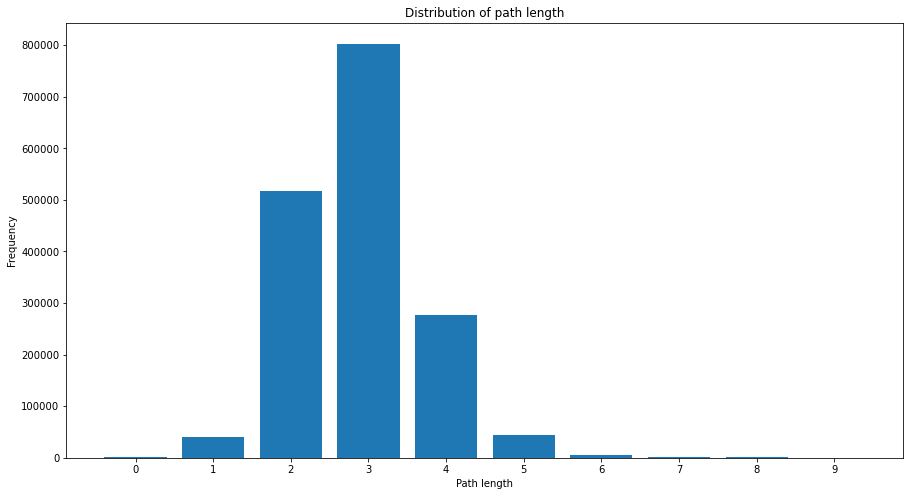

In [10]:
# plot distribution of path length
x = np.arange(len(distance)) # set bin width according to key of {distance}
plt.figure(figsize=(15,8))
plt.bar(x, distance.values())
plt.title('Distribution of path length')
plt.xticks(x, distance)
plt.xlabel('Path length')
plt.ylabel('Frequency')
plt.show()

In [11]:
# average path length
nx.average_shortest_path_length(wiki_sub)

2.8792828803221413

In [12]:
# Compute the x values and y values for clustering coefficient distribution plot
cluster_coeff = nx.clustering(wiki_sub)
sum_cluster_coeff = {}
for i in cluster_coeff.values():
    j = float(np.round(i, 2))
    if j not in sum_cluster_coeff:
        sum_cluster_coeff[j] = 1
    else:
        sum_cluster_coeff[j] += 1

In [13]:
a = list(sum_cluster_coeff.keys())
b = list(sum_cluster_coeff.values())

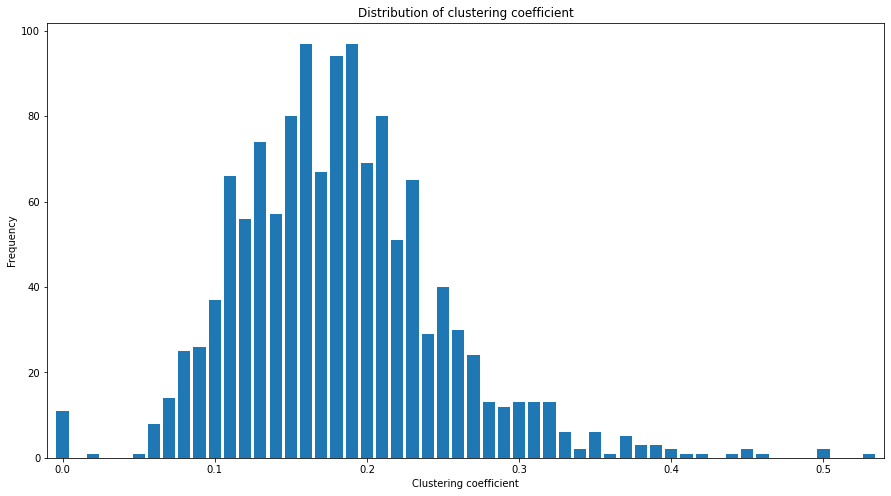

In [14]:
# plot distribution of clustering coefficient
plt.figure(figsize=(15,8))
plt.bar(a, b, width=0.008)
plt.title('Distribution of clustering coefficient')
plt.xlabel('Clustering coefficient')
plt.ylabel('Frequency')
plt.xlim([-0.01,max(a)+0.01])
plt.show()

In [15]:
# average clustering coefficient
nx.average_clustering(wiki_sub)

0.18221830113253618

##### (b) Random graph

In [16]:
# (a) Generate a random graph
G = nx.binomial_graph(1000, 0.01, seed=5008, directed=True)

In [ ]:
# (b) Show the random graph obtained
plt.figure(figsize=(100,100))
nx.draw(G, node_size = 200)

In [18]:
# (c) Repeat steps in part (a)
N = G.number_of_nodes()
dict_in = dict(G.in_degree())
dict_out = dict(G.out_degree())
dict_d = dict(G.degree())
print("Average degree:", sum(dict_d.values())/N)
print("Average in-degree:", sum(dict_in.values())/N)
print("Average out-degree:", sum(dict_out.values())/N)

Average degree: 19.706
Average in-degree: 9.853
Average out-degree: 9.853


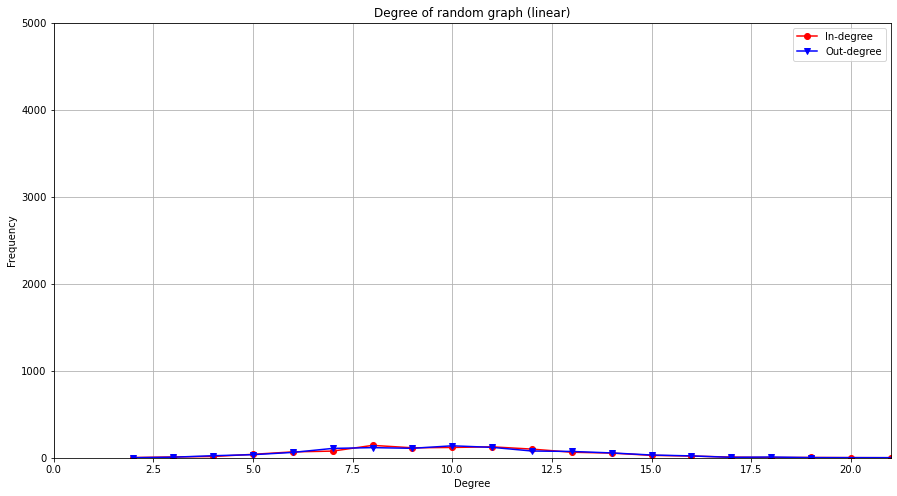

In [19]:
# Compute the x values and y values for degree distribution plot
# Include in-degree and out-degree
in_d = set(dict_in.values())
out_d = set(dict_out.values())
in_freq = []
for i in in_d:
    count = 0
    for j in dict_in.values():
        if j == i:
            count += 1
    in_freq.append(count)
out_freq = []
for i in out_d:
    count = 0
    for j in dict_out.values():
        if j == i:
            count += 1
    out_freq.append(count)
# Degree distribution plot in linear scale
plt.figure(figsize=(15,8))
plt.plot(list(in_d), in_freq, 'ro-')
plt.plot(list(out_d), out_freq, 'bv-')
plt.title('Degree of random graph (linear)')
plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim([0,max(in_d)])
plt.ylim([0,5000])
plt.show()

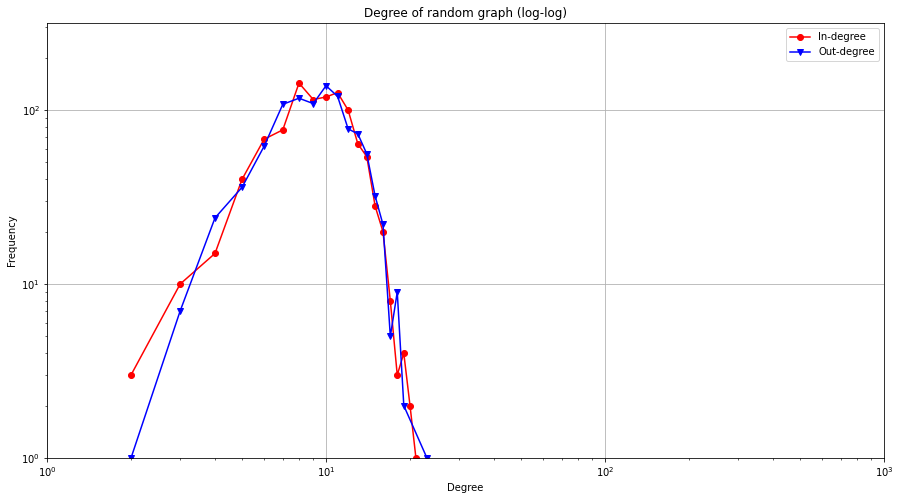

In [20]:
# Degree distribution plot in log scale
plt.figure(figsize=(15,8))
plt.loglog(list(in_d), in_freq, 'ro-')
plt.loglog(list(out_d), out_freq, 'bv-')
plt.title('Degree of random graph (log-log)')
plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.xlim([10**0,10**3])
plt.ylim([10**0,10**2.5])
plt.show()

In [21]:
# Density
print("Density: ", nx.density(G))

Density:  0.009862862862862863


In [22]:
# Find the largest strongly connected component
largest = max(nx.strongly_connected_components(G), key=len)
print('The largest strongly connected component (giant component):\n', largest)
print('The number of nodes in giant component:', len(largest))

The largest strongly connected component (giant component):
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209

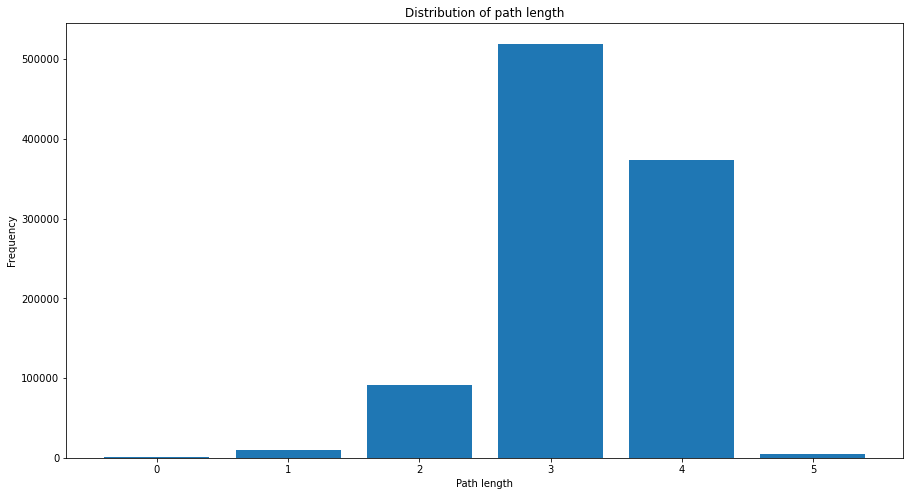

In [23]:
# Compute the x values and y values for path length distribution plot
SG = G.subgraph(largest)
distance = {}
for i in list(nx.all_pairs_shortest_path_length(SG)):
    for j in i[1].values():
        if j not in distance:
            distance[j] = 1
        else:
            distance[j] += 1
# plot distribution of path length
x = np.arange(len(distance)) # set bin width according to key of {distance}
plt.figure(figsize=(15,8))
plt.bar(x, distance.values())
plt.title('Distribution of path length')
plt.xticks(x, distance)
plt.xlabel('Path length')
plt.ylabel('Frequency')
plt.show()

In [24]:
# average path length
nx.average_shortest_path_length(SG)

3.2714034034034034

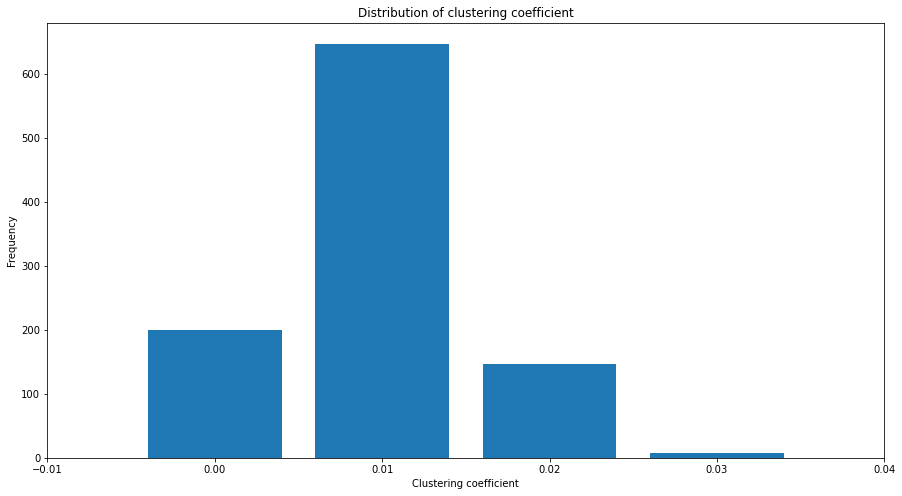

In [25]:
# Compute the x values and y values for clustering coefficient distribution plot
cluster_coeff = nx.clustering(SG)
sum_cluster_coeff = {}
for i in cluster_coeff.values():
    j = float(np.round(i, 2))
    if j not in sum_cluster_coeff:
        sum_cluster_coeff[j] = 1
    else:
        sum_cluster_coeff[j] += 1
a = list(sum_cluster_coeff.keys())
b = list(sum_cluster_coeff.values())
# plot distribution of clustering coefficient
plt.figure(figsize=(15,8))
plt.bar(a, b, width=0.008)
plt.title('Distribution of clustering coefficient')
plt.xlabel('Clustering coefficient')
plt.ylabel('Frequency')
plt.xlim([-0.01,max(a)+0.01])
plt.show()

In [26]:
# average clustering coefficient
nx.average_clustering(SG)

0.009611558637296442

##### (d) Discussion

In the discussion, I will separate into 3 parts to discuss, which is the 3 key points of our concern in network:
+ degree
+ distance
+ cluster
  
By requirement in assignment, *distance and cluster will be discussed about the largest strongly connected component (giant component)*.

#### <u>Background</u>
In part (a), I am using a dataset called "Wiki-vote.txt", which is a network in real world about Wikipedia voting on promotion to administratorship (till January 2008), containing **7115 nodes with 103,689 edges**.  
In part (a), I am using a NetworkX function to generate a random directed graph, which contains **1000 nodes with 1% probability of edge creation**.  
  
#### <u>Degree</u>  
For degree, there are average degree, average in-degree and average out-degree.  
  
 Network | Avg. degree | Avg. in-degree | Avg. out-degree |
:-----|:-----|:-----|:-----|
 Wiki-vote | 29.147 | 14.573 | 14.573 |
 Random | 19.706 | 9.853 | 9.853 |  

From the above table, Wiki-vote network's degree is generally higher than the random network's one. The difference may be due to the number of nodes (scale of the network). Besides, the average in-degree is same as the average out-degree in the same network.  
  
From the linear plot, we cannot observe anything due to the scale. From the log-log plot, we can observe that most nodes concentrate in a small value in the plot. And in Wiki-vote, they nearly form **a straight line with negative slope**, which implies that **the higher the degree, the lower the frequency**. However, **in random graph, it does not totally follow the "small world" phenomenon**. The distribution is somehow like binomial distribution (bell shape) and the highest frequency is at around 10 degrees instead of 0.

The density of Wiki-vote is much smaller than that of the random graph, which are 0.00205 and 0.00986 respectively.  
  
#### <u>Distance</u>  
First, we can discuss the giant component briefly. For Wiki-vote, 1300 of 7115 nodes are in it. **Surprisingly, for random graph, 1000 of 1000 nodes are in it, which means that the whole graph is one giant component and it is not happening in reality**.

Although the number of nodes in Wiki-vote is larger than that in the random graph, and the proportion of nodes in giant component is much different, they have quite similar average shortest path length inside the giant component, which are 2.88 and 3.27 respectively. **Both of their average shortest path length follows binomial distribution when Wiki-vote has a larger diversity, ranging from 0 to 9 (random graph: 0 to 5)**.
  
#### <u>Cluster</u>  
Clustering coefficienct has a similar distribution as average shortest path length one. **Both network follows binomial distribution when Wiki-vote has a larger diversity (has a longer tail in plot), ranging from 0 to ~0.55 (random graph: 0 to 0.33)**.  
  
And Wiki-vote has a higher clustering coefficient than random graph, which is 0.182 and 0.00961 respectively. By definition, the higher the clustering coefficient, the tighter the cluster. Thus, **in terms of giant component, Wiki-vote has a tighter cluster than random graph**.
  
#### <u>Conclusion</u>
**A random graph can simulate the real-world network in certain extent but it is not totally the same**. For some basic features, such as average degree, average shortest path length, a random graph can satisfy. However, the structure of network, especially the giant component and its cluster, is totally different. The random graph is not as tight as the real-world network.